In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.stats as stats
from scipy.stats import normaltest
import seaborn as sns
from scipy.stats import norm
from scipy.stats import pearsonr, spearmanr
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
pip install mediapipe

In [2]:
!pip install lxml

In [42]:
dataset = pd.read_csv('insurance_data.csv')

In [43]:
features = ['age','gender','bmi','bloodpressure','diabetic','children','smoker','region']

In [44]:
train_x = dataset[features]

In [45]:
characteristics = ['claim']

In [46]:
train_y = dataset[characteristics]

In [47]:
train_x.fillna(train_x.mean(numeric_only=True).round(1), inplace=True)

C:\Users\abdir\AppData\Local\Temp\ipykernel_16804\917740912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x.fillna(train_x.mean(numeric_only=True).round(1), inplace=True)


In [48]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.9+ KB


In [49]:
train_x = train_x.replace(to_replace = np.nan, value = 'southeast')

In [50]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1340 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.9+ KB


In [51]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train_x['gender'] = lb_make.fit_transform(train_x['gender'])
train_x['diabetic'] = lb_make.fit_transform(train_x['diabetic'])
train_x['smoker'] = lb_make.fit_transform(train_x['smoker'])
train_x['region'] = lb_make.fit_transform(train_x['region'])

In [52]:
train_x

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region
0,39.0,1,23.2,91,1,0,0,2
1,24.0,1,30.1,87,0,0,0,2
2,38.1,1,33.3,82,1,0,0,2
3,38.1,1,33.7,80,0,0,0,1
4,38.1,1,34.1,100,0,0,0,1
...,...,...,...,...,...,...,...,...
1335,44.0,0,35.5,88,1,0,1,1
1336,59.0,0,38.1,120,0,1,1,0
1337,30.0,1,34.5,91,1,3,1,1
1338,37.0,1,30.4,106,0,0,1,2


In [53]:
train_y

,claim
0,1121.87
1,1131.51
2,1135.94
3,1136.40
4,1137.01
...,...
1335,55135.40
1336,58571.07
1337,60021.40
1338,62592.87


In [54]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
train_x = sc_x.fit_transform(train_x)
train_y = sc_y.fit_transform(train_y)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 1)

In [56]:
# Set up a helper function for checking p-values against an alpha level, and printing result
def check_p_val(p_val, alpha):

    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

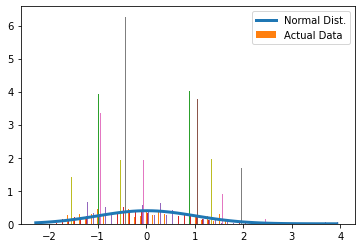

In [57]:
# Plot a histogram of the observed data
#  Included is expected distribution, if the data is normally distributed, with the same mean and std of the data. 
xs = np.arange(x_train.min(), train_x.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(x_train), np.std(x_train))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(x_train, 50, density=True, label='Actual Data');
plt.legend();

In [58]:
# Check the documentation for normaltest
normaltest?

In [59]:
# Run normal test on the data
stat, p_val = normaltest(x_train, axis = None)

In [60]:
# Check the p-value of the normaltest
print('\nNormaltest p-value is: {:1.10f} \n'.format(p_val))

# With alpha value of 0.05, how should we proceed
check_p_val(p_val, alpha=0.05)


Normaltest p-value is: 0.0000000000 

We have evidence to reject the null hypothesis.


In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [62]:
ann = tf.keras.models.Sequential()

In [63]:
ann.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))

In [64]:
ann.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))

In [65]:
ann.add(tf.keras.layers.Dense(units = 20, activation = 'relu'))

In [66]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'relu'))

In [67]:
ann.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),loss = 'mean_squared_error', metrics = ["mae"])

In [68]:
history = ann.fit(x_train, y_train, batch_size = 32, epochs = 30,validation_data=(x_test, y_test))

Epoch 1/30
34/34 [==============================] - 3s 17ms/step - loss: 0.6072 - mae: 0.6374 - val_loss: 0.5017 - val_mae: 0.6218
Epoch 2/30
34/34 [==============================] - 0s 4ms/step - loss: 0.4006 - mae: 0.5353 - val_loss: 0.4166 - val_mae: 0.5601
Epoch 3/30
34/34 [==============================] - 0s 5ms/step - loss: 0.3738 - mae: 0.5138 - val_loss: 0.4056 - val_mae: 0.5515
Epoch 4/30
34/34 [==============================] - 0s 5ms/step - loss: 0.3577 - mae: 0.5024 - val_loss: 0.4038 - val_mae: 0.5473
Epoch 5/30
34/34 [==============================] - 0s 4ms/step - loss: 0.3496 - mae: 0.4949 - val_loss: 0.4028 - val_mae: 0.5466
Epoch 6/30
34/34 [==============================] - 0s 4ms/step - loss: 0.3443 - mae: 0.4896 - val_loss: 0.4031 - val_mae: 0.5451
Epoch 7/30
34/34 [==============================] - 0s 4ms/step - loss: 0.3443 - mae: 0.4915 - val_loss: 0.3970 - val_mae: 0.5424
Epoch 8/30
34/34 [==============================] - 0s 4ms/step - loss: 0.3388 - mae: 0.4

In [69]:
y_pred = ann.predict(x_test)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

9/9 [==============================] - 0s 2ms/step


array([[13252.75],
       [13252.75],
       [31244.1 ],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [18389.61],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [29588.29],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [15028.32],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [15194.68],
       [13252.75],
       [15549.7 ],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [1325

In [70]:
y_pred

array([[13252.75],
       [13252.75],
       [31244.1 ],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [18389.61],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [29588.29],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [15028.32],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [15194.68],
       [13252.75],
       [15549.7 ],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [13252.75],
       [1325

In [71]:
y_test = sc_y.inverse_transform(y_test)

In [72]:
np.set_printoptions(precision = 2)

In [73]:
print(np.concatenate((y_pred, y_test),1))

[[13252.75  7727.25]
 [13252.75 21344.85]
 [31244.1  17663.14]
 [13252.75  6393.6 ]
 [13252.75 11381.33]
 [13252.75  4357.04]
 [13252.75  6653.79]
 [13252.75  8551.35]
 [13252.75 10825.25]
 [13252.75 10601.41]
 [13252.75  1694.8 ]
 [13252.75  7518.03]
 [18389.61 25678.78]
 [13252.75 10942.13]
 [13252.75  3046.06]
 [13252.75  5966.89]
 [13252.75  1136.4 ]
 [13252.75 11165.42]
 [13252.75  6196.45]
 [13252.75 13393.76]
 [13252.75  4504.66]
 [13252.75 10197.77]
 [13252.75  1977.82]
 [13252.75  4454.4 ]
 [13252.75  6551.75]
 [13252.75 10214.64]
 [13252.75  1727.54]
 [29588.29 26392.26]
 [13252.75  9869.81]
 [13252.75  2104.11]
 [13252.75 13919.82]
 [13252.75 10579.71]
 [13252.75  4402.23]
 [13252.75  3877.3 ]
 [15028.32 14571.89]
 [13252.75  9563.03]
 [13252.75  1391.53]
 [13252.75  6837.37]
 [13252.75  5327.4 ]
 [15194.68 18767.74]
 [13252.75  4428.89]
 [15549.7  11840.78]
 [13252.75  2632.99]
 [13252.75 19214.71]
 [13252.75  6858.48]
 [13252.75  2198.19]
 [13252.75  7160.09]
 [13252.75 20

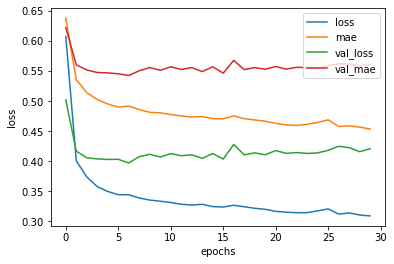

In [74]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [75]:
mae = tf.metrics.mean_absolute_error(y_true=y_test.squeeze(), 
                                     y_pred=y_pred.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6783.554>

In [76]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               900       
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 20)                1020      
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,991
Trainable params: 6,991
Non-trainable params: 0
_________________________________________________________________


In [77]:
x = tf.Variable(2, name = 'x', dtype = tf.float32)
x

<tf.Variable 'x:0' shape=() dtype=float32, numpy=2.0>

In [78]:
print(x)

<tf.Variable 'x:0' shape=() dtype=float32, numpy=2.0>


In [79]:
history.history

{'loss': [0.6071749925613403,
  0.400611013174057,
  0.3738331198692322,
  0.3576872944831848,
  0.3496443033218384,
  0.3442663550376892,
  0.34429776668548584,
  0.33883941173553467,
  0.3354041278362274,
  0.333517462015152,
  0.3313990831375122,
  0.32846206426620483,
  0.3271135985851288,
  0.328325480222702,
  0.3245248794555664,
  0.3238644003868103,
  0.3267924189567566,
  0.32428207993507385,
  0.32176318764686584,
  0.32007738947868347,
  0.31671321392059326,
  0.3152152895927429,
  0.31438010931015015,
  0.3145720362663269,
  0.3174475431442261,
  0.3207330107688904,
  0.3121096193790436,
  0.3140707314014435,
  0.31056520342826843,
  0.3090932369232178],
 'mae': [0.6373698115348816,
  0.5352647304534912,
  0.5138328075408936,
  0.5024092197418213,
  0.4949483871459961,
  0.48963260650634766,
  0.4915316700935364,
  0.4856812655925751,
  0.4811458885669708,
  0.4803048372268677,
  0.4774145483970642,
  0.4751338064670563,
  0.47330740094184875,
  0.47410956025123596,
  0.470

In [80]:
#print("Evaluate on test data")
#results = ann.evaluate(x_test, y_test, batch_size=128)
#print("test loss, test acc:", results)

